<a href="https://colab.research.google.com/github/reznimat/ppzd_sp/blob/main/semestralni_prace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Načtení knihoven

In [73]:
import csv
import pandas as pd
import math as mt
import datetime as dt
from matplotlib import pyplot as plt
import datetime
# from tabulate import tabulate

print('knihovny načteny')

knihovny načteny


# Načtení datových souborů

In [92]:
# POZOR, pouze vzorek dat
#url_sales = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/SAMPLE_Online_Sales.csv'
url_sales = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Online_Sales.csv'
df_sales = pd.read_csv(url_sales)
# převod textu na datum
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'],format='%m/%d/%Y').dt.strftime('%m/%d/%Y')

url_coupons = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Discount_Coupon.csv'
df_coupons = pd.read_csv(url_coupons,sep=";")

url_tax = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Tax_amount.csv' #původní GST ve formátu 10% ručně upraveno na GST_pct ve formátu 10 (18 položek)
df_tax = pd.read_csv(url_tax,sep=";")

url_marketing = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Marketing_Spend.csv'
df_marketing = pd.read_csv(url_marketing,sep=";")
#převod textu na datum
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'],format='%m/%d/%Y').dt.strftime('%m/%d/%Y')


#print(df_sales.head().to_markdown())
#print(df_marketing.head().to_markdown())

print('datové soubory načteny')

datové soubory načteny


# Číselníky

In [83]:
# Kalendář
c_calendar = []
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

for day in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=day)
    c_calendar.append((current_date.strftime("%m/%d/%Y"), current_date.strftime('%b')))

#c_calendar = pd.DataFrame.from_records(c_calendar, columns=['Date', 'Month'])

# Čísleník měsíců
c_months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

# Čísleník produktových kategorií
c_product_category = set()
for i, row in df_sales.iterrows():
  c_product_category.add(row["Product_Category"])

# Čísleník produktů
c_products = set()
for i, row in df_sales.iterrows():
  c_products.add((row["Product_SKU"],row["Product_Description"],row['Product_Category']))

#Číselník měsíců a kategorií
c_month_categories = []

for month in c_months:
  for category in c_product_category:
    novy_radek = [month, category]
    c_month_categories.append(novy_radek)

# Seznam jedinečných transakcí
c_transactions = set()
for i, row in df_sales.iterrows():
  c_transactions.add(row["Transaction_ID"])

#print(c_product_category)  # vypíše seznam produktových kategorií
#print(c_months)
#print(c_month_categories)
#print(c_transactions)
#print(c_products)
print(c_calendar)

print('číselníky vytvořeny')

[('01/01/2019', 'Jan'), ('01/02/2019', 'Jan'), ('01/03/2019', 'Jan'), ('01/04/2019', 'Jan'), ('01/05/2019', 'Jan'), ('01/06/2019', 'Jan'), ('01/07/2019', 'Jan'), ('01/08/2019', 'Jan'), ('01/09/2019', 'Jan'), ('01/10/2019', 'Jan'), ('01/11/2019', 'Jan'), ('01/12/2019', 'Jan'), ('01/13/2019', 'Jan'), ('01/14/2019', 'Jan'), ('01/15/2019', 'Jan'), ('01/16/2019', 'Jan'), ('01/17/2019', 'Jan'), ('01/18/2019', 'Jan'), ('01/19/2019', 'Jan'), ('01/20/2019', 'Jan'), ('01/21/2019', 'Jan'), ('01/22/2019', 'Jan'), ('01/23/2019', 'Jan'), ('01/24/2019', 'Jan'), ('01/25/2019', 'Jan'), ('01/26/2019', 'Jan'), ('01/27/2019', 'Jan'), ('01/28/2019', 'Jan'), ('01/29/2019', 'Jan'), ('01/30/2019', 'Jan'), ('01/31/2019', 'Jan'), ('02/01/2019', 'Feb'), ('02/02/2019', 'Feb'), ('02/03/2019', 'Feb'), ('02/04/2019', 'Feb'), ('02/05/2019', 'Feb'), ('02/06/2019', 'Feb'), ('02/07/2019', 'Feb'), ('02/08/2019', 'Feb'), ('02/09/2019', 'Feb'), ('02/10/2019', 'Feb'), ('02/11/2019', 'Feb'), ('02/12/2019', 'Feb'), ('02/13/20

# Definice funkcí

In [91]:
# funkce pro výpočet sales_amount po slevě na úrovni item
# není zohledněna doprava (předpoklad, že ta je relevantní pro úroveň transaction)
def Revenue(row):
    if row["Coupon_Status"] == 'Not Used':
      return (row["Quantity"]*row["Avg_Price"]) #*(1+(row["GST_pct"]/100))
    else:
      return (row["Quantity"]*row["Avg_Price"])*(1-(row["Discount_pct"]/100)) #*(1+(row["GST_pct"]/100))

#     Funkce pro extrahování zkratky měsíce z daného sloupce Data.
# Převod Transaction_Date ve formátu m/d/Y (1/20/2019) na month abrevation (Jan)
def MonthAbrv(df, date_column_name):
    return pd.to_datetime(df[date_column_name], format='%m/%d/%Y').dt.strftime('%b')

print('funkce definovány')

funkce definovány


# Calculate revenue for each transaction and item level

 - Hint:
  - InvoiceValue = (( QuantityAvg_price)(1-Dicount_pct)*(1+GST))+Delivery_Charges
  - Revenue = (Quantity Avg_price)*(1-Dicount_pct)


## Obohacení df_sales o atribut Month (Date Abrv)

In [97]:
df_sales['Month'] = MonthAbrv(df_sales, 'Transaction_Date')

print('v df_sales je nyní sloupec Month\n')
#print(df_sales.tail().to_markdown())


v df_sales je nyní sloupec Month

|       |   CustomerID |   Transaction_ID | Transaction_Date   | Product_SKU    | Product_Description                             | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   |
|------:|-------------:|-----------------:|:-------------------|:---------------|:------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|
| 52919 |        14410 |            48493 | 12/31/2019         | GGOENEBB078899 | Nest Cam Indoor Security Camera - USA           | Nest-USA           |          1 |      121.3  |               6.5  | Clicked         | Dec     |
| 52920 |        14410 |            48494 | 12/31/2019         | GGOEGAEB091117 | Google Zip Hoodie Black                         | Apparel            |          1 |       48.92 |               6.5  | Used            | Dec     |
| 52921 |        14410 |            48495 | 12/31/

## Spojení df_sales s df_coupons

In [98]:
#Merge Sales a Coupons na základě Product_Category a Month
df_sales = pd.merge(df_sales,df_coupons, on=["Product_Category","Month"])

#Merge Sales a Tax na základe Product_Category
# df_sales = pd.merge(df_sales,df_tax, on=["Product_Category"])

print('do df_sales byly připojeny data z df_coupons\n')
print(df_sales.head().to_markdown())

do df_sales byly připojeny data z df_coupons

|    |   CustomerID |   Transaction_ID | Transaction_Date   | Product_SKU    | Product_Description                                    | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   | Coupon_Code   |   Discount_pct |
|---:|-------------:|-----------------:|:-------------------|:---------------|:-------------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|:--------------|---------------:|
|  0 |        17850 |            16679 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |          1 |      153.71 |                6.5 | Used            | Jan     | ELEC10        |             10 |
|  1 |        17850 |            16680 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |

## Obohacení df_sales o Revenue

In [99]:
# nejsou započítány náklady na dopravu a daně
df_sales["Revenue"] = df_sales.apply(Revenue,axis = 1)

print('df_sales bylo obohaceno o sloupec Revenue\n')
print(df_sales.head().to_markdown())


df_sales bylo obohaceno o sloupec Revenue

|    |   CustomerID |   Transaction_ID | Transaction_Date   | Product_SKU    | Product_Description                                    | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   | Coupon_Code   |   Discount_pct |   Revenue |
|---:|-------------:|-----------------:|:-------------------|:---------------|:-------------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|:--------------|---------------:|----------:|
|  0 |        17850 |            16679 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |          1 |      153.71 |                6.5 | Used            | Jan     | ELEC10        |             10 |   138.339 |
|  1 |        17850 |            16680 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stain

## Revenue per transaction


In [100]:
df = df_sales[["Transaction_ID","Transaction_Date","Month","Revenue"]]

df2 = df.groupby(by=["Transaction_ID","Transaction_Date","Month"]).sum(["Revenue"])

print(df2.head().to_markdown())

|                              |   Revenue |
|:-----------------------------|----------:|
| (16679, '01/01/2019', 'Jan') |   138.339 |
| (16680, '01/01/2019', 'Jan') |   138.339 |
| (16681, '01/01/2019', 'Jan') |     1.845 |
| (16682, '01/01/2019', 'Jan') |   634.916 |
| (16684, '01/01/2019', 'Jan') |   294.336 |


# Výpočet a graf výnosů po dnech

In [101]:
work_list = []

for Date, Month in c_calendar:
      filtered_df = df_sales[(df_sales['Transaction_Date'] == Date)]
      sum_of_sales = filtered_df['Revenue'].sum()
      work_list.append((Date, sum_of_sales))

df_DailySales = pd.DataFrame.from_records(work_list, columns=['Date', 'DailyRevenue']) # převod listu na data_frame

print(df_DailySales.head().to_markdown())

|    | Date       |   DailyRevenue |
|---:|:-----------|---------------:|
|  0 | 01/01/2019 |        6726.75 |
|  1 | 01/02/2019 |       12204.9  |
|  2 | 01/03/2019 |       21724    |
|  3 | 01/04/2019 |       14980.4  |
|  4 | 01/05/2019 |       15846.7  |


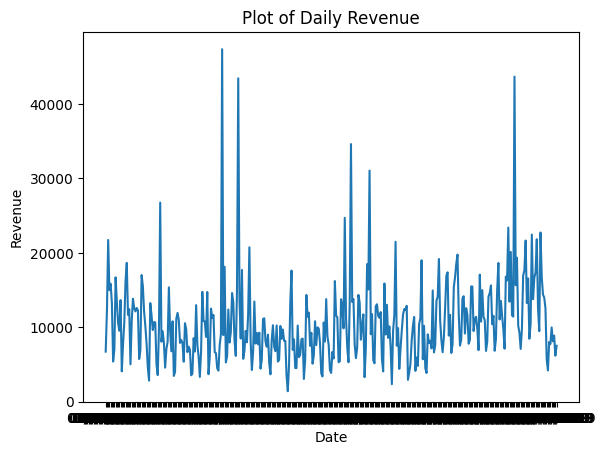

In [120]:
# Create plot (replace with your desired plot type)
plt.plot(df_DailySales["Date"], df_DailySales["DailyRevenue"])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Plot of Daily Revenue')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

# Výpočet a graf celkových výnosů po měsících

## Výpočet

In [125]:
work_list = []

for month in c_months:
  filtered_df = df_sales[(df_sales['Month'] == month)]
  sum_of_sales = filtered_df['Revenue'].sum()
  work_list.append((month, sum_of_sales))

df_MonthSales = pd.DataFrame.from_records(work_list, columns=['Month', 'MonthRevenue']) # převod listu na data_frame

print(df_MonthSales.to_markdown())

|    | Month   |   MonthRevenue |
|---:|:--------|---------------:|
|  0 | Jan     |         366879 |
|  1 | Feb     |         256633 |
|  2 | Mar     |         259261 |
|  3 | Apr     |         363000 |
|  4 | May     |         252411 |
|  5 | Jun     |         240392 |
|  6 | Jul     |         338576 |
|  7 | Aug     |         331994 |
|  8 | Sep     |         268301 |
|  9 | Oct     |         373345 |
| 10 | Nov     |         422158 |
| 11 | Dec     |         391789 |


## Graf

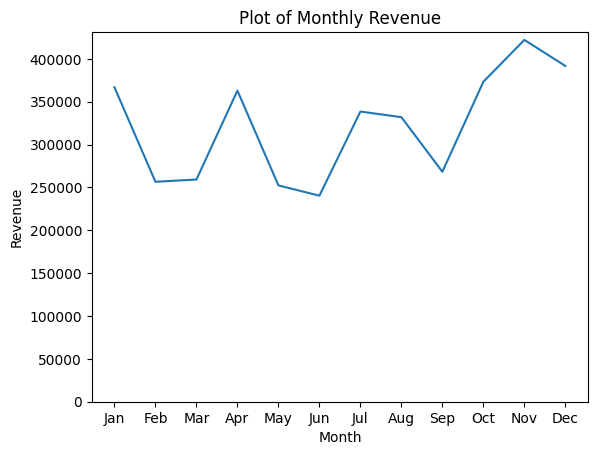

In [119]:
# Create plot (replace with your desired plot type)
plt.plot(df_MonthSales["month"], df_MonthSales["MonthRevenue"])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Plot of Monthly Revenue')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

## Připojení souboru s marketingovými náklady k df_MonthSales

In [114]:
df_marketing['Month'] = MonthAbrv(df_marketing, 'Date')
df_marketing['Total_Spend'] = df_marketing['Offline_Spend']+df_marketing['Online_Spend']

print(df_marketing.head().to_markdown())

|    | Date       |   Offline_Spend |   Online_Spend | Month   |   Total_Spend |
|---:|:-----------|----------------:|---------------:|:--------|--------------:|
|  0 | 01/01/2019 |            4500 |        2424.5  | Jan     |       6924.5  |
|  1 | 01/02/2019 |            4500 |        3480.36 | Jan     |       7980.36 |
|  2 | 01/03/2019 |            4500 |        1576.38 | Jan     |       6076.38 |
|  3 | 01/04/2019 |            4500 |        2928.55 | Jan     |       7428.55 |
|  4 | 01/05/2019 |            4500 |        4055.3  | Jan     |       8555.3  |


In [113]:
work_list = []

for  month in c_months:
  filtered_df = df_marketing[(df_marketing['Month'] == month)]
  sum_online = filtered_df['Online_Spend'].sum()
  sum_offline = filtered_df['Offline_Spend'].sum()
  sum_total = filtered_df['Total_Spend'].sum()
  work_list.append((month, sum_online, sum_offline, sum_total))

df_MonthlyMarketing = pd.DataFrame.from_records(work_list, columns=['Month', 'Online_Spend', 'Offline_Spend','Total_Spend']) # převod listu na data_frame

print(df_MonthlyMarketing.to_markdown())

|    | Month   |   Online_Spend |   Offline_Spend |   Total_Spend |
|---:|:--------|---------------:|----------------:|--------------:|
|  0 | Jan     |        58329   |           96600 |        154929 |
|  1 | Feb     |        55807.9 |           81300 |        137108 |
|  2 | Mar     |        48750.1 |           73500 |        122250 |
|  3 | Apr     |        61026.8 |           96000 |        157027 |
|  4 | May     |        52759.6 |           65500 |        118260 |
|  5 | Jun     |        53818.1 |           80500 |        134318 |
|  6 | Jul     |        52717.8 |           67500 |        120218 |
|  7 | Aug     |        57404.1 |           85500 |        142904 |
|  8 | Sep     |        52514.5 |           83000 |        135515 |
|  9 | Oct     |        57724.6 |           93500 |        151225 |
| 10 | Nov     |        68145   |           93000 |        161145 |
| 11 | Dec     |        76648.8 |          122000 |        198649 |


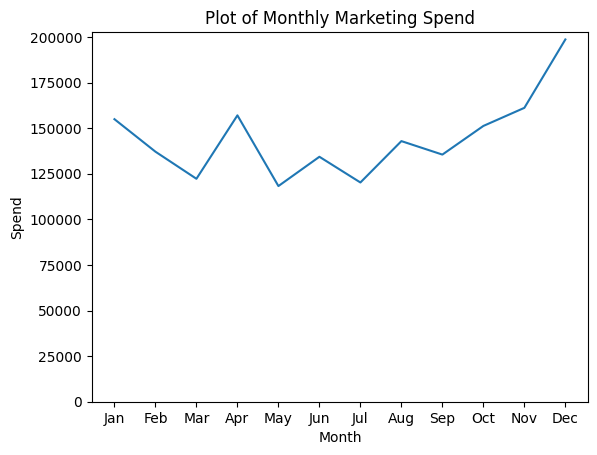

In [118]:
# Create plot (replace with your desired plot type)
plt.plot(df_MonthlyMarketing["Month"], df_MonthlyMarketing["Total_Spend"])
plt.xlabel('Month')
plt.ylabel('Spend')
plt.title('Plot of Monthly Marketing Spend')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

# Tržby po kategoriích a měsících

### Funkční (ale nekonečný) výpočet měsíčních prodejů po kategoriích

In [12]:
#work_list = []

#for mesic in c_months:
#  for kategorie in c_product_category:
#    CategoryRevenue = 0
#    for i, row in df_sales.iterrows():
#      if row.Product_Category == kategorie and row.Month == mesic:
#        CategoryRevenue += row.Revenue
#    work_list.append((kategorie, mesic, CategoryRevenue)) # append vypočítaný záznam do listu

#    print()
#    slovnik["kategorie"] = kategorie
#    slovnik["mesic"] = mesic
#    slovnik["Sales"] = CategorySales

#df_CatMonSales = pd.DataFrame.from_records(work_list, columns=['kategorie', 'mesic','CategoryRevenue']) # převod listu na data_frame

#print(df_CatMonSales.head().to_markdown())

##Výpočet

In [122]:
work_list = []

for month, category in c_month_categories:
  filtered_df = df_sales[(df_sales['Month'] == month) & (df_sales['Product_Category'] == category)]
  sum_of_sales = filtered_df['Revenue'].sum()
  work_list.append((month, category, sum_of_sales))

df_MonthCategorySales = pd.DataFrame.from_records(work_list, columns=['month', 'category','CategoryRevenue']) # převod listu na data_frame

print(df_MonthCategorySales.head().to_markdown())


|    | month   | category    |   CategoryRevenue |
|---:|:--------|:------------|------------------:|
|  0 | Jan     | Office      |          24949.1  |
|  1 | Jan     | Gift Cards  |            257.9  |
|  2 | Jan     | Nest-Canada |           8777.05 |
|  3 | Jan     | Drinkware   |          13378    |
|  4 | Jan     | Bags        |           9948.57 |


## Graf

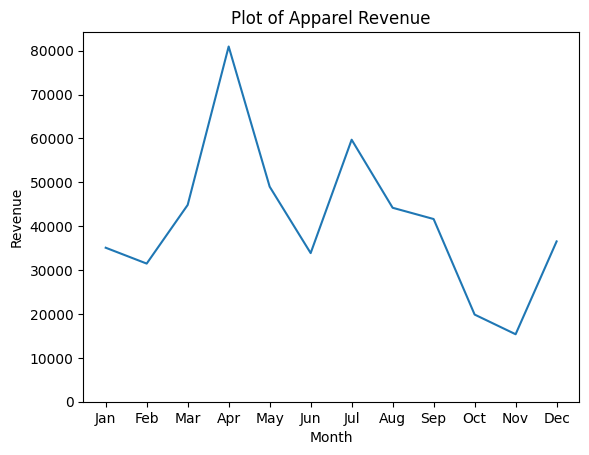

In [123]:
# Specify categories to plot
categories_to_plot = ['Apparel']

# Filter data for desired categories
filtered_data = df_MonthCategorySales[df_MonthCategorySales['category'].isin(categories_to_plot)]

# Create plot (replace with your desired plot type)
plt.plot(filtered_data["month"], filtered_data["CategoryRevenue"])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Plot of Apparel Revenue')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

# Spojit mothly sales a monthly marketing spend do jednoho df a grafu

In [126]:
#Merge Sales a Tax na základe Product_Category
df_SalesMarketing = pd.merge(df_MonthSales,df_MonthlyMarketing, on=["Month"])

print(df_SalesMarketing)

   Month  MonthRevenue  Online_Spend  Offline_Spend  Total_Spend
0    Jan    366879.080      58328.95          96600    154928.95
1    Feb    256632.518      55807.92          81300    137107.92
2    Mar    259261.203      48750.09          73500    122250.09
3    Apr    363000.202      61026.83          96000    157026.83
4    May    252410.914      52759.64          65500    118259.64
5    Jun    240392.257      53818.14          80500    134318.14
6    Jul    338576.358      52717.85          67500    120217.85
7    Aug    331994.114      57404.15          85500    142904.15
8    Sep    268301.389      52514.54          83000    135514.54
9    Oct    373344.944      57724.65          93500    151224.65
10   Nov    422157.618      68144.96          93000    161144.96
11   Dec    391788.737      76648.75         122000    198648.75


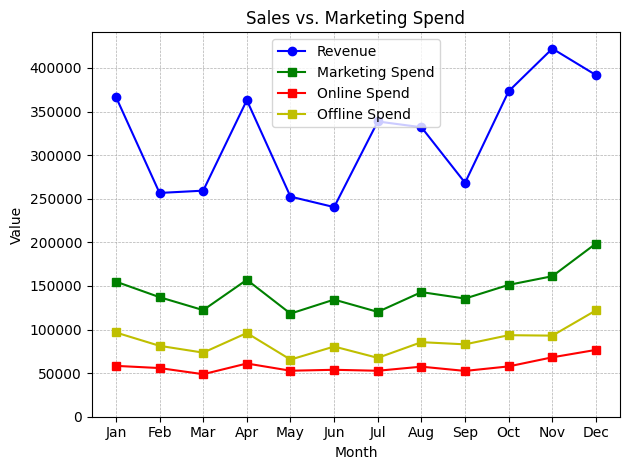

In [130]:
# Plot the first line (Sales)
plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['MonthRevenue'], label='Revenue', marker='o', color='b')

# Plot the second line (Marketing Spend)
plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['Total_Spend'], label='Marketing Spend', marker='s', color='g')

plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['Online_Spend'], label='Online Spend', marker='s', color='r')


plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['Offline_Spend'], label='Offline Spend', marker='s', color='y')


# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Sales vs. Marketing Spend')

# Add legend to distinguish lines
plt.legend()

# Optional: Customize gridlines and axes
plt.grid(True, linestyle='--', linewidth=0.5)  # Add gridlines with style and width

plt.tight_layout()  # Adjust spacing between elements
plt.ylim(bottom=0) # y začíná na 0
plt.show()